<a href="https://colab.research.google.com/github/krauseannelize/nb-py-ms-exercises/blob/sprint05/notebooks/s05_pandas_eda/46_bivariate_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 46 | Bivariate Analysis

## Scatter Plot

**Scatter Plot** visualizations provide an intuitive and immediate understanding of how two variables interact. It can:

- reveal patterns such as linear or nonlinear correlations, clusters, and outliers that might not be evident in raw data,
- identify trends, such as positive or negative associations, the strength of relationships, and potential cause-effect insights.

### Direct Linear Relationship

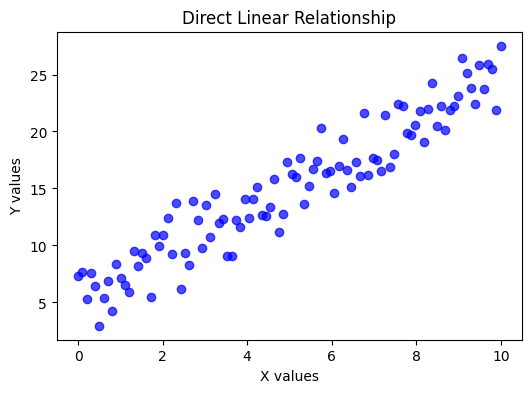

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 10, 100)
y = 2 * x + 5 + np.random.normal(0, 2, size=100)

plt.figure(figsize=(6, 4))
plt.scatter(x, y, alpha=0.7, color='b')
plt.xlabel("X values")
plt.ylabel("Y values")
plt.title("Direct Linear Relationship")
plt.show()

### Indirect Linear Relationship

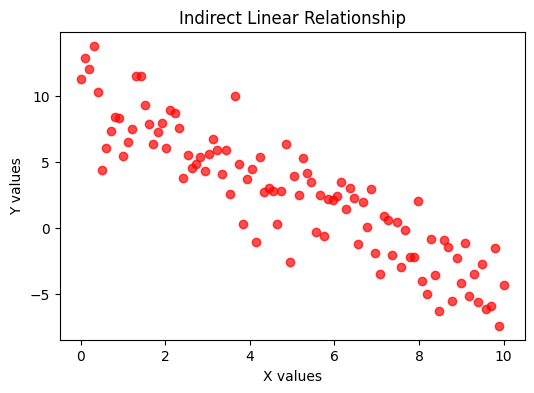

In [2]:
x = np.linspace(0, 10, 100)
y = -1.5 * x + 10 + np.random.normal(0, 2, size=100)

plt.figure(figsize=(6, 4))
plt.scatter(x, y, alpha=0.7, color='r')
plt.xlabel("X values")
plt.ylabel("Y values")
plt.title("Indirect Linear Relationship")
plt.show()

### Exponential Relationship

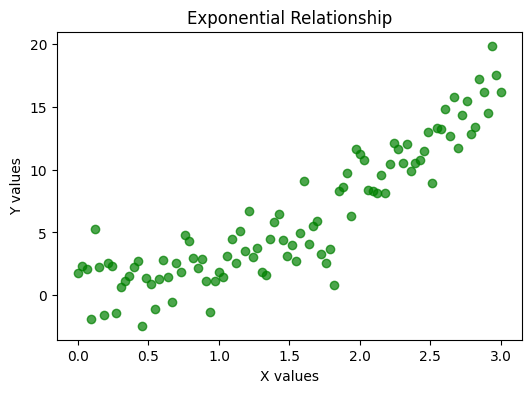

In [3]:
x = np.linspace(0, 3, 100)
y = np.exp(x) + np.random.normal(0, 2, size=100)

plt.figure(figsize=(6, 4))
plt.scatter(x, y, alpha=0.7, color='g')
plt.xlabel("X values")
plt.ylabel("Y values")
plt.title("Exponential Relationship")
plt.show()

### No Clear Relatioship

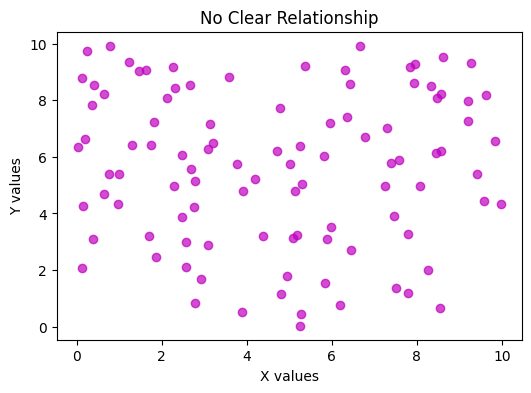

In [4]:
x = np.random.uniform(0, 10, 100)
y = np.random.uniform(0, 10, 100)

plt.figure(figsize=(6, 4))
plt.scatter(x, y, alpha=0.7, color='m')
plt.xlabel("X values")
plt.ylabel("Y values")
plt.title("No Clear Relationship")
plt.show()

## Correlation

**Correlation** simply measures the strength and direction of a relationship between two variables.

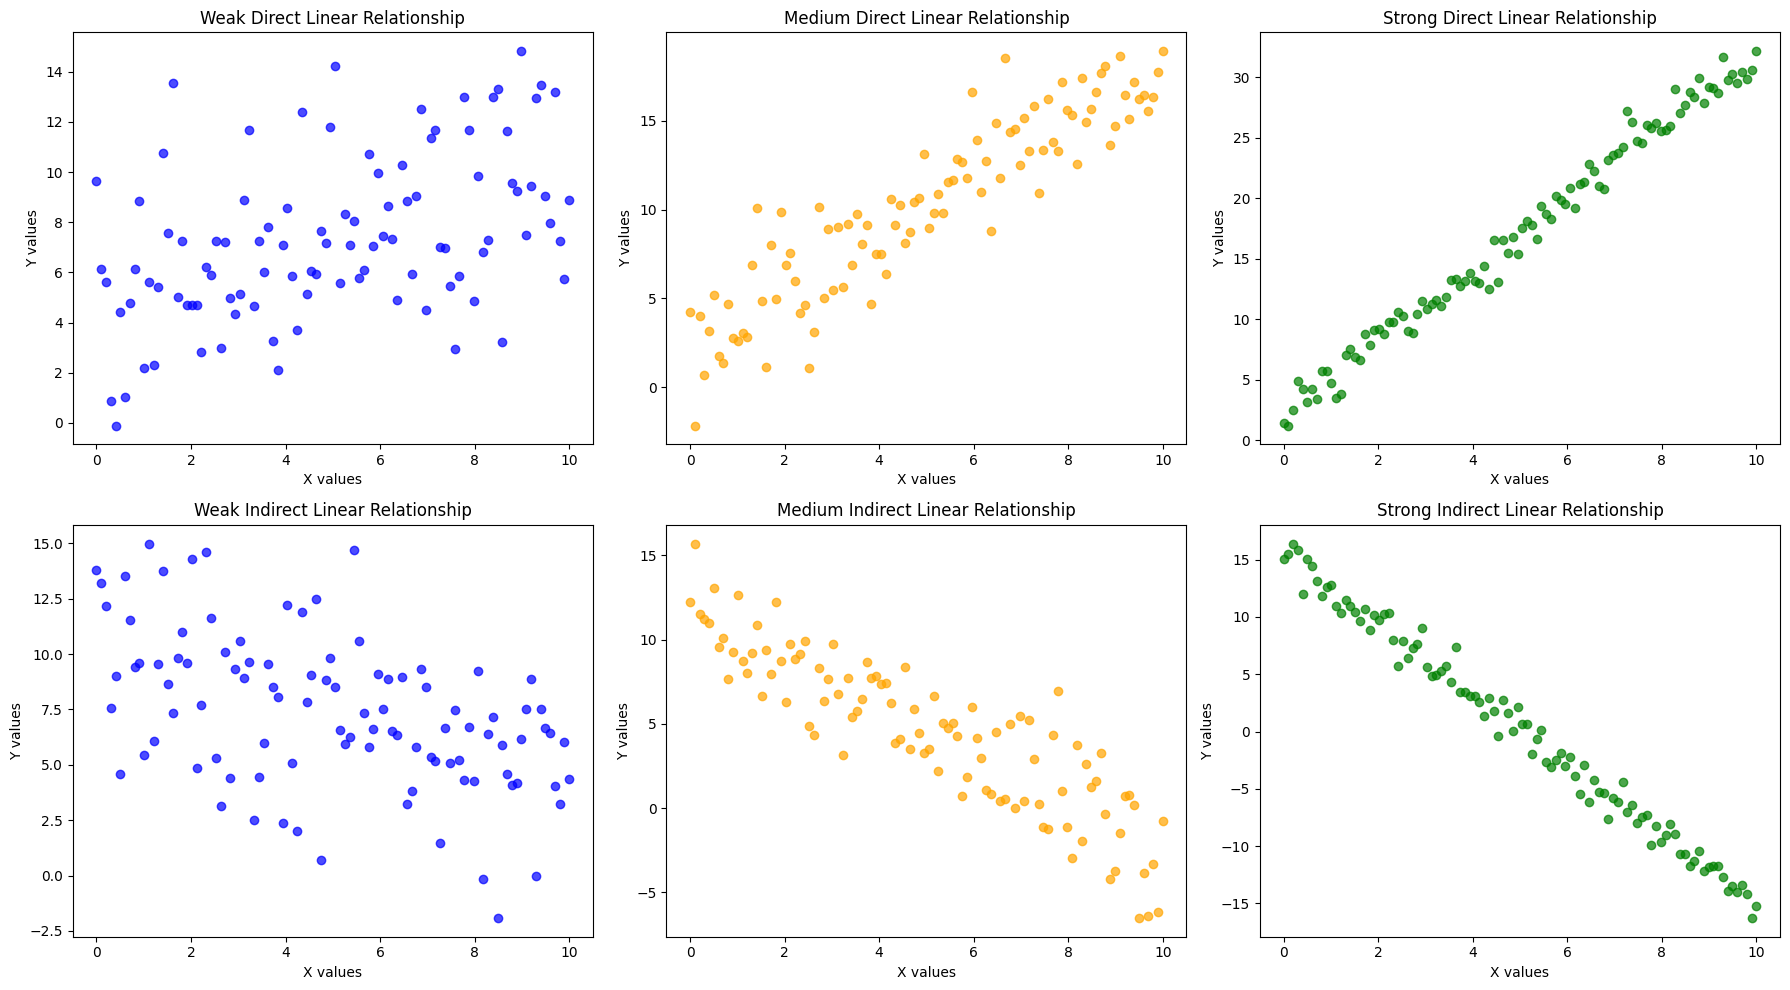

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Create a single figure with six subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Flatten to 1D array for easy indexing
axes = axes.flatten()

# Generate common x values
x = np.linspace(0, 10, 100)

# Weak Direct Linear Relationship (low slope, high noise)
y_weak_d = 0.5 * x + 5 + np.random.normal(0, 3, size=100)
axes[0].scatter(x, y_weak_d, alpha=0.7, color='b')
axes[0].set_xlabel("X values")
axes[0].set_ylabel("Y values")
axes[0].set_title("Weak Direct Linear Relationship")

# Medium Direct Linear Relationship (moderate slope, medium noise)
y_medium_d = 1.5 * x + 3 + np.random.normal(0, 2, size=100)
axes[1].scatter(x, y_medium_d, alpha=0.7, color='orange')
axes[1].set_xlabel("X values")
axes[1].set_ylabel("Y values")
axes[1].set_title("Medium Direct Linear Relationship")

# Strong Direct Linear Relationship (steep slope, low noise)
y_strong_d = 3 * x + 2 + np.random.normal(0, 1, size=100)
axes[2].scatter(x, y_strong_d, alpha=0.7, color='g')
axes[2].set_xlabel("X values")
axes[2].set_ylabel("Y values")
axes[2].set_title("Strong Direct Linear Relationship")

# Weak Indirect Linear Relationship (low negative slope, high noise)
y_weak_i = -0.5 * x + 10 + np.random.normal(0, 3, size=100)
axes[3].scatter(x, y_weak_i, alpha=0.7, color='b')
axes[3].set_xlabel("X values")
axes[3].set_ylabel("Y values")
axes[3].set_title("Weak Indirect Linear Relationship")

# Medium Indirect Linear Relationship (moderate negative slope, medium noise)
y_medium_i = -1.5 * x + 12 + np.random.normal(0, 2, size=100)
axes[4].scatter(x, y_medium_i, alpha=0.7, color='orange')
axes[4].set_xlabel("X values")
axes[4].set_ylabel("Y values")
axes[4].set_title("Medium Indirect Linear Relationship")

# Strong Indirect Linear Relationship (steep negative slope, low noise)
y_strong_i = -3 * x + 15 + np.random.normal(0, 1, size=100)
axes[5].scatter(x, y_strong_i, alpha=0.7, color='g')
axes[5].set_xlabel("X values")
axes[5].set_ylabel("Y values")
axes[5].set_title("Strong Indirect Linear Relationship")

# Adjust layout
plt.tight_layout()
plt.show()

## Pearson Correlation Coefficient

The **Pearson correlation coefficient (r)** is a statistical measure that quantifies the strength and direction of the linear relationship between two continuous variables.

In [10]:
# Step 1: Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Load 'penguins' dataset from seaborn
penguins = sns.load_dataset('penguins')

# Step 3: Preview data
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


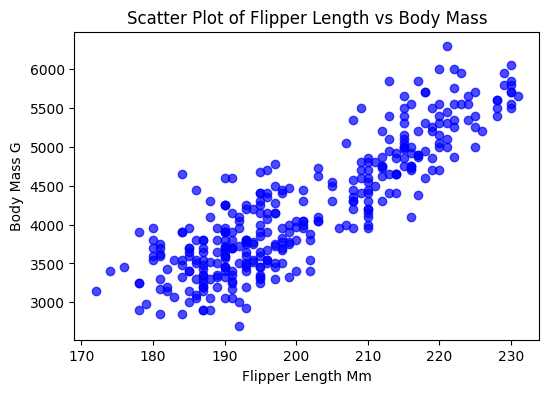

In [13]:
# Step 4: Aliasing long column names
var1 = "flipper_length_mm"
var2 = "body_mass_g"

# Step 5: Clean data
penguins_clean = penguins[[var1, var2]].dropna()

# Step 6: Create scatter plot
plt.figure(figsize=(6, 4))
plt.scatter(penguins_clean[var1], penguins_clean[var2], alpha=0.7, color='b')
plt.xlabel(var1.replace("_", " ").title())
plt.ylabel(var2.replace("_", " ").title())
plt.title("Scatter Plot of Flipper Length vs Body Mass")

# Step 7: Show the plot
plt.show()

In [15]:
# Step 8: Calculate Pearson Correlation using Pandas `.corr()` function
flipper_mass_corr = penguins_clean[var1].corr(penguins_clean[var2], method='pearson')

# Step 9: Display the correlation result
print(f"The Pearson correlation coefficient is {flipper_mass_corr:.2f}.")

The Pearson correlation coefficient is 0.87.


Using `scipy` instead of `pandas` to calculate the Pearson Correlation:

In [16]:
import scipy.stats as stats

# Compute Pearson correlation
correlation, p_value = stats.pearsonr(penguins_clean[var1], penguins_clean[var2])

# Display results
print(f"Pearson Correlation: {correlation:.4f}")
print(f"P-value: {p_value:.4f}")

Pearson Correlation: 0.8712
P-value: 0.0000


**Strength and Direction of Pearson Correlation**

- **Postive** correlation: As one variable increases, the other also increases, e.g. more study, higher exam scores
- **Negative** correlation: As one variable increases, the other decreases, e.g. more tv, lower exam scores

| Positive | Negative | Correlation |
| --- | --- | --- |
| 0.00 to 0.09 | -0.00 to -0.09 | None |
| 0.10 to 0.39 | -0.10 to -0.39 | Weak |
| 0.40 to 0.69 | -0.40 to -0.69 | Moderate |
| 0.70 to 0.89 | -0.70 to -0.89 | Strong |
| 0.90 to 1.00 | -0.90 to -1.00 | Very Strong |

## Correlation Heatmap

A **correlation heatmap** visually displays how numerical variables relate to each other using a color-coded grid. Warm colors show strong positive correlations, cool colors show strong negative ones, and neutral tones indicate weak or no correlation.

**Why Use It?**

- Reveals strong relationships between variables
- Flags multicollinearity (when two or more independent variables in a regression model are highly correlated) for model tuning
- Simplifies data exploration and interpretation
- Inspires feature engineering and better decisions

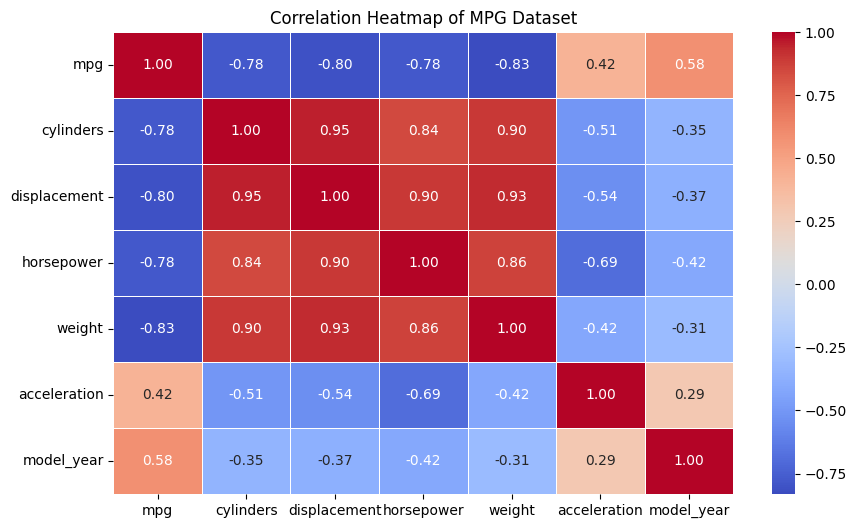

In [17]:
# Step 1: Import libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Step 3: Load the `mpg` dataset from seaborn
mpg = sns.load_dataset("mpg")

# Step 4: Drop non-numeric columns
mpg_numeric = mpg.select_dtypes(include=[np.number])

# Step 5: Compute the correlation matrix
corr_matrix = mpg_numeric.corr()

# Step 6: Set the figure size
plt.figure(figsize=(10, 6))

# Step 7: Create the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Step 8: Add a title and display heatmap
plt.title("Correlation Heatmap of MPG Dataset")
plt.show()

## Chi-Square Test

The **Chi-Square test** is a statistical method used to determine whether there is a significant association between categorical variables. It compares observed frequencies in different categories with the expected frequencies assuming no relationship exists between them.

In **univariate analysis**, the Chi-Square test is particularly useful when examining the distribution of categorical data to check if certain categories occur more or less frequently than expected. This helps in identifying patterns, dependencies, or inconsistencies in the data.

In [21]:
# Step 1: Import libraries
import seaborn as sns
import pandas as pd
from scipy.stats import chi2_contingency

# Step 2: Load the 'tips' dataset from seaborn
tips = sns.load_dataset('tips')

# Step 3: Preview `tips` dataset
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [22]:
# Step 4: Create a contingency table
contingency_table = pd.crosstab(tips['day'], tips['time'])

# Step 5: Display contigency table
contingency_table

time,Lunch,Dinner
day,,
Thur,61,1
Fri,7,12
Sat,0,87
Sun,0,76


In [23]:
# Step 6: Perform the Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Step 7: Print results
print("Chi-Square Statistic:", chi2)
print("P-Value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

# Step 8: Interpret results
if p < 0.05:
    print("Conclusion: There is a significant relationship between day and time.")
else:
    print("Conclusion: There is no significant relationship between day and time.")

Chi-Square Statistic: 217.1126728434853
P-Value: 8.449897551777147e-47
Degrees of Freedom: 3
Expected Frequencies:
 [[17.27868852 44.72131148]
 [ 5.29508197 13.70491803]
 [24.24590164 62.75409836]
 [21.18032787 54.81967213]]
Conclusion: There is a significant relationship between day and time.


## ANOVA

**ANOVA (Analysis of Variance)** is a statistical technique used to determine whether there are significant differences between the means of three or more independent groups. It works by analyzing the variance within each group and comparing it to the variance between groups to assess whether the differences in means are statistically significant.

In **univariate analysis**, ANOVA is particularly useful when dealing with a single continuous variable and a categorical variable with multiple groups, helping to determine if group membership affects the outcome variable. If the ANOVA test finds a significant effect, post-hoc tests (such as Tukey's HSD) can be used to identify which specific groups differ from each other.

In [28]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Step 2: Generate sample data
np.random.seed(42)

diet_A = np.random.normal(loc=5, scale=1.5, size=30)  # Mean weight loss ~5 kg
diet_B = np.random.normal(loc=6, scale=1.2, size=30)  # Mean weight loss ~6 kg
diet_C = np.random.normal(loc=7, scale=1.3, size=30)  # Mean weight loss ~7 kg

# Step 3: Combine into a DataFrame
data = pd.DataFrame({
    'weight_loss': np.concatenate([diet_A, diet_B, diet_C]),
    'diet_type': ['A'] * 30 + ['B'] * 30 + ['C'] * 30
})

# Step 4: Preview first few rows
print(data)

    weight_loss diet_type
0      5.745071         A
1      4.792604         A
2      5.971533         A
3      7.284545         A
4      4.648770         A
..          ...       ...
85     6.347716         C
86     8.190023         C
87     7.427376         C
88     6.311312         C
89     7.667248         C

[90 rows x 2 columns]


In [29]:
# Step 5: ANOVA using statsmodels
model = ols('weight_loss ~ C(diet_type)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Step 6: Display the ANOVA table
print(anova_table)

                  sum_sq    df          F        PR(>F)
C(diet_type)   79.282189   2.0  25.121379  2.445101e-09
Residual      137.284469  87.0        NaN           NaN


## Bivariate Analysis on the `mpg` Dataset

In [30]:
# Step 1: Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from scipy.stats import chi2_contingency, f_oneway

# Step 2: Loading the MPG Dataset
mpg = sns.load_dataset('mpg')

# Step 3: Summary Statistics
print("Summary Statistics:")
mpg.describe()

Summary Statistics:


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [31]:
# Step 4: Checking for Missing Values
print("Missing Values:")
mpg.isnull().sum()

Missing Values:


,0
mpg,0
cylinders,0
displacement,0
horsepower,6
weight,0
acceleration,0
model_year,0
origin,0
name,0


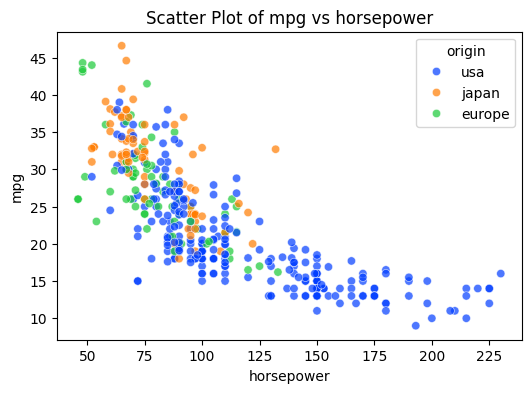

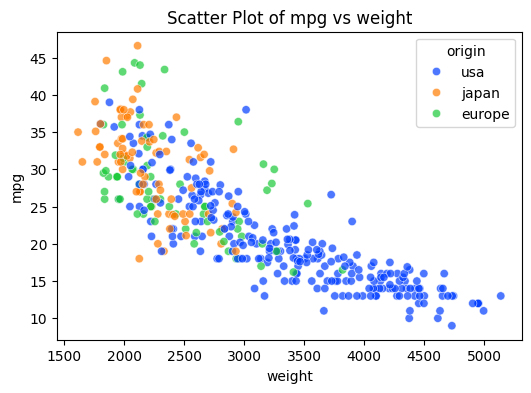

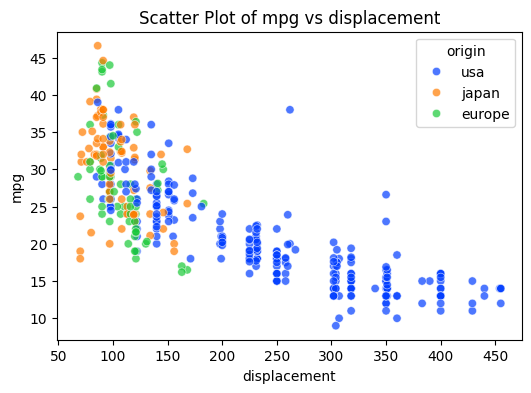

In [62]:
# Step 5: Scatter Plots for Numerical Relationships
numerical_pairs = [('horsepower', 'mpg'), ('weight', 'mpg'), ('displacement', 'mpg')]
for x, y in numerical_pairs:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=mpg, x=x, y=y, hue='origin', alpha=0.7, palette='bright')
    plt.title(f'Scatter Plot of {y} vs {x}')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

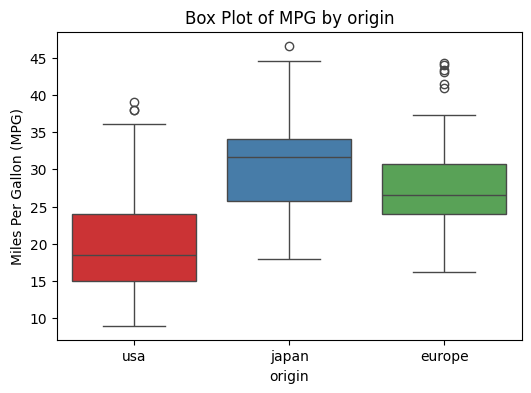

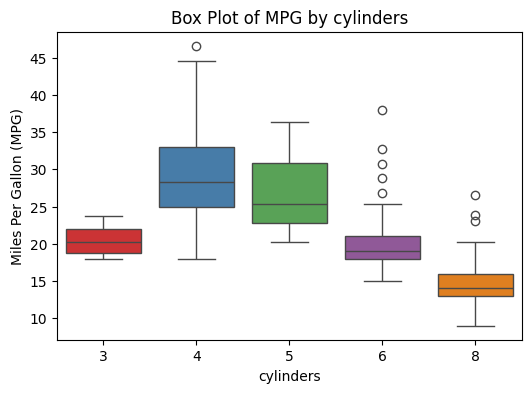

In [57]:
# Step 6: Box Plots for Categorical and Numerical Relationships
categorical_cols = ['origin', 'cylinders']
for cat in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=mpg, x=cat, y='mpg', hue=cat, palette='Set1', legend=False)
    plt.title(f'Box Plot of MPG by {cat}')
    plt.xlabel(cat)
    plt.ylabel('Miles Per Gallon (MPG)')
    plt.show()

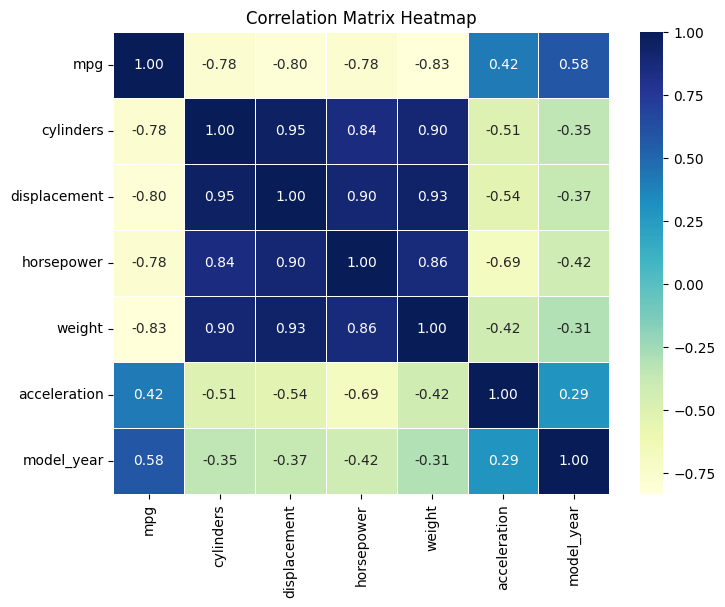

In [37]:
# Step 7: Heatmap for Correlation Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(mpg.corr(numeric_only=True), annot=True, cmap='YlGnBu', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

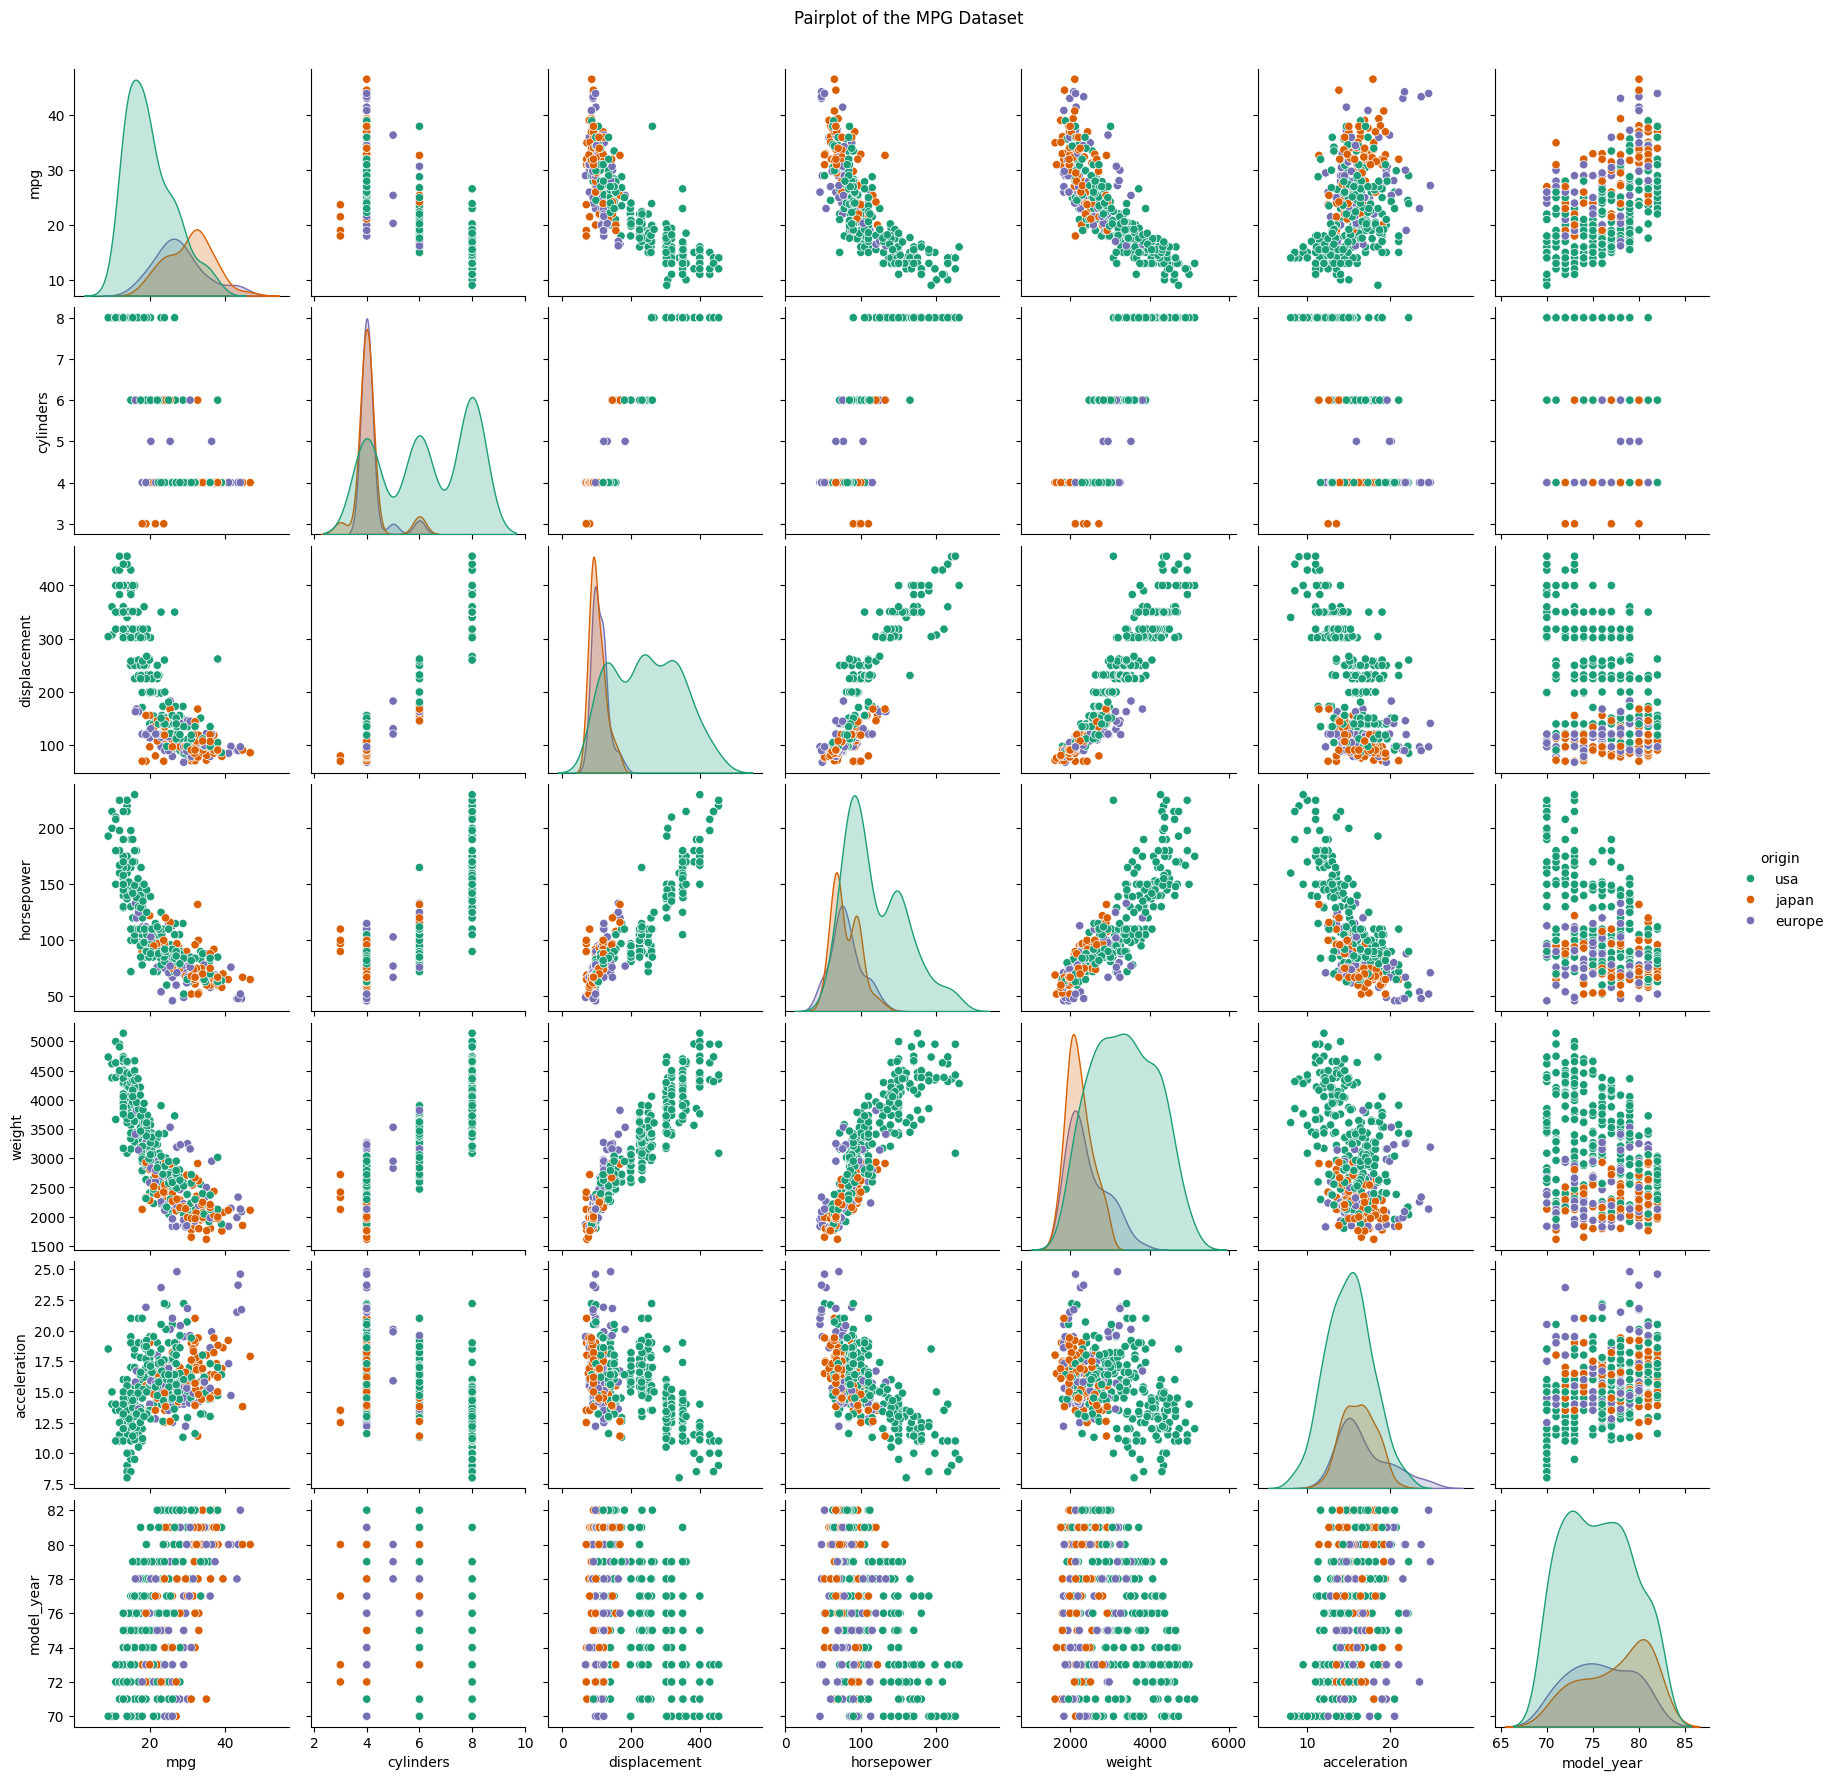

In [46]:
# Step 8: Pairplot for Visualizing Relationships
sns.pairplot(mpg, hue='origin', diag_kind='kde', palette='Dark2')
plt.suptitle("Pairplot of the MPG Dataset", y=1.02)
plt.show()

In [48]:
# Step 9: Chi-Square Test for Categorical Variables
contingency_table = pd.crosstab(mpg['origin'], mpg['cylinders'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("Chi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2}, p-value: {p}")

Chi-Square Test Results:
Chi-Square Statistic: 180.10177141976715, p-value: 9.800693325588298e-35


In [49]:
# Step 10: ANOVA Test for Numerical Variables Across Categorical Groups
mpg_grouped = [mpg[mpg['origin'] == category]['mpg'].dropna() for category in mpg['origin'].unique()]
anova_stat, anova_p = f_oneway(*mpg_grouped)
print("ANOVA Test Results:")
print(f"ANOVA Statistic: {anova_stat}, p-value: {anova_p}")

ANOVA Test Results:
ANOVA Statistic: 98.54179491075867, p-value: 1.915486418412936e-35
